<a href="https://colab.research.google.com/github/manjunathsirur1994/Time_series_forecasting/blob/main/TimeSeriesForecasting_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shenba/time-series-datasets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shenba/time-series-datasets/versions/1


In [2]:
import pandas as pd
df = pd.read_csv(r'/root/.cache/kagglehub/datasets/shenba/time-series-datasets/versions/1/Electric_Production.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [3]:
df = df.rename(columns={df.columns[1]:'consumption', 'DATE':'date'})
df

,date,consumption
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         397 non-null    datetime64[ns]
 1   consumption  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [5]:
df['date'].min(), df['date'].max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

In [6]:
from datetime import datetime

df['date'].max() - df['date'].min()

Timedelta('12053 days 00:00:00')

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['day_of_year'] = df['date'].dt.day_of_year
df['week_of_year'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

In [8]:
df

,date,consumption,year,month,weekday,day_of_year,week_of_year,quarter
0,1985-01-01,72.5052,1985,1,1,1,1,1
1,1985-02-01,70.6720,1985,2,4,32,5,1
2,1985-03-01,62.4502,1985,3,4,60,9,1
3,1985-04-01,57.4714,1985,4,0,91,14,2
4,1985-05-01,55.3151,1985,5,2,121,18,2
...,...,...,...,...,...,...,...,...
392,2017-09-01,98.6154,2017,9,4,244,35,3
393,2017-10-01,93.6137,2017,10,6,274,39,4
394,2017-11-01,97.3359,2017,11,2,305,44,4
395,2017-12-01,114.7212,2017,12,4,335,48,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          397 non-null    datetime64[ns]
 1   consumption   397 non-null    float64       
 2   year          397 non-null    int32         
 3   month         397 non-null    int32         
 4   weekday       397 non-null    int32         
 5   day_of_year   397 non-null    int32         
 6   week_of_year  397 non-null    UInt32        
 7   quarter       397 non-null    int32         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(5)
memory usage: 16.0 KB


In [10]:
df.set_index('date', inplace=True)
df.head()

,consumption,year,month,weekday,day_of_year,week_of_year,quarter
date,,,,,,,
1985-01-01,72.5052,1985,1,1,1,1,1
1985-02-01,70.6720,1985,2,4,32,5,1
1985-03-01,62.4502,1985,3,4,60,9,1
1985-04-01,57.4714,1985,4,0,91,14,2
1985-05-01,55.3151,1985,5,2,121,18,2


In [11]:
df = df.resample('M').mean()
df

<ipython-input-11-ee0ff99f3bf3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()


,consumption,year,month,weekday,day_of_year,week_of_year,quarter
date,,,,,,,
1985-01-31,72.5052,1985.0,1.0,1.0,1.0,1.0,1.0
1985-02-28,70.6720,1985.0,2.0,4.0,32.0,5.0,1.0
1985-03-31,62.4502,1985.0,3.0,4.0,60.0,9.0,1.0
1985-04-30,57.4714,1985.0,4.0,0.0,91.0,14.0,2.0
1985-05-31,55.3151,1985.0,5.0,2.0,121.0,18.0,2.0
...,...,...,...,...,...,...,...
2017-09-30,98.6154,2017.0,9.0,4.0,244.0,35.0,3.0
2017-10-31,93.6137,2017.0,10.0,6.0,274.0,39.0,4.0
2017-11-30,97.3359,2017.0,11.0,2.0,305.0,44.0,4.0


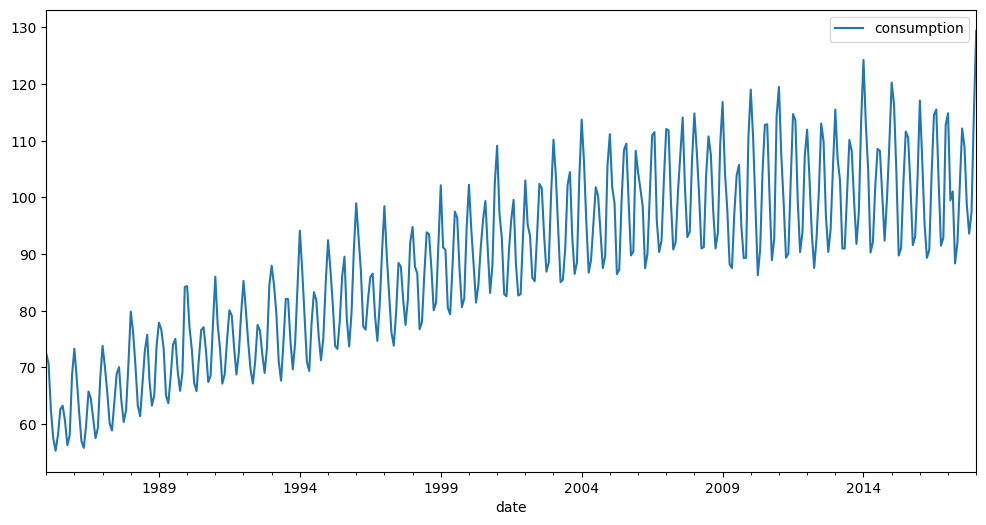

In [12]:
df[['consumption']].plot(figsize=(12,6));

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['consumption'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'Critical Values: {result[4]}')

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


In [14]:
df['consumption_diff'] = df['consumption'].diff()
df.dropna(inplace=True)
df

,consumption,year,month,weekday,day_of_year,week_of_year,quarter,consumption_diff
date,,,,,,,,
1985-02-28,70.6720,1985.0,2.0,4.0,32.0,5.0,1.0,-1.8332
1985-03-31,62.4502,1985.0,3.0,4.0,60.0,9.0,1.0,-8.2218
1985-04-30,57.4714,1985.0,4.0,0.0,91.0,14.0,2.0,-4.9788
1985-05-31,55.3151,1985.0,5.0,2.0,121.0,18.0,2.0,-2.1563
1985-06-30,58.0904,1985.0,6.0,5.0,152.0,22.0,2.0,2.7753
...,...,...,...,...,...,...,...,...
2017-09-30,98.6154,2017.0,9.0,4.0,244.0,35.0,3.0,-10.3158
2017-10-31,93.6137,2017.0,10.0,6.0,274.0,39.0,4.0,-5.0017
2017-11-30,97.3359,2017.0,11.0,2.0,305.0,44.0,4.0,3.7222


In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['consumption_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'Critical Values: {result[4]}')

ADF Statistic: -7.104891
p-value: 0.000000
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


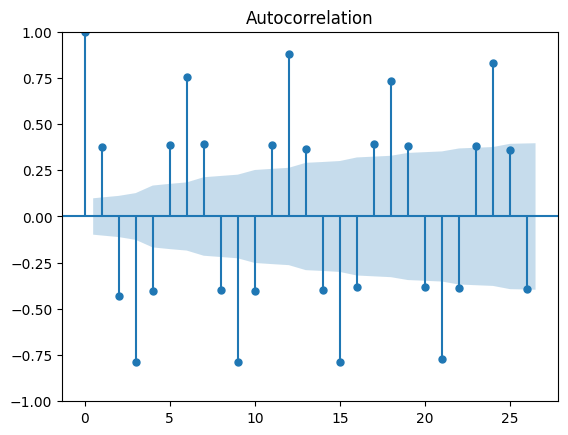

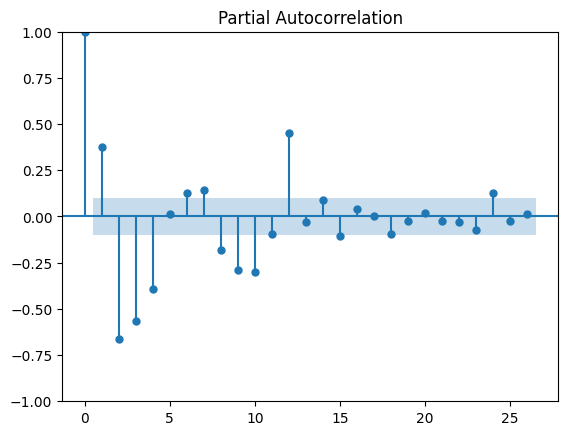

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['consumption_diff']);
plot_pacf(df['consumption_diff']);

In [17]:
df.shape

(396, 8)

In [18]:
df_train = df.head(300)
df_test = df.tail(96)

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings
warnings.filterwarnings('ignore')

p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

model_params = {}
for param in pdq:
  try:
    model = ARIMA(df_train['consumption'], order=param, freq='ME')
    model_fit = model.fit()
    model_params[param] = model_fit.aic
    # print(f'ARIMA {param} - AIC: {model_fit.aic}')
  except:
    continue

In [20]:
min(model_params, key=model_params.get)

(2, 1, 4)

In [21]:
model = ARIMA(df_train['consumption'], order = (2,1,4), freq="ME")
model_fit = model.fit()
y_pred = model_fit.predict(start=df_test.index[0], end=df_test.index[-1])

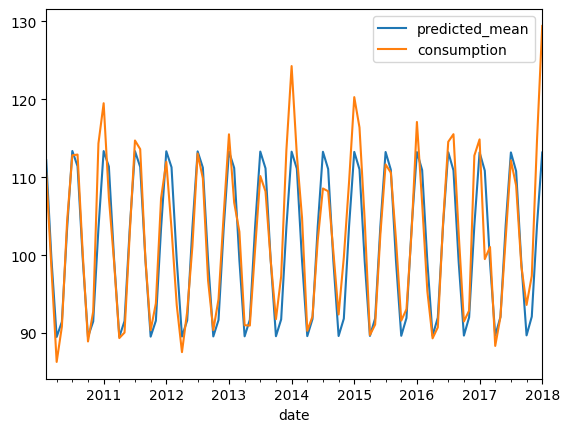

In [23]:
y_pred.plot(legend=True)
df_test['consumption'].plot(legend=True);

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_test['consumption'], y_pred)

17.772998784667177

In [239]:
import yfinance as yf

In [240]:
ticker_symbol = 'LLOYDSME.NS'
df = yf.download(ticker_symbol, start='2000-01-01', multi_level_index=False)
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-07-17 00:00:00+00:00,562.558289,563.299988,582.700012,550.500000,554.000000,417232
2023-07-18 00:00:00+00:00,543.583313,544.299988,573.900024,531.000000,573.900024,284708
2023-07-19 00:00:00+00:00,565.504395,566.250000,572.000000,541.250000,564.700012,208966
2023-07-20 00:00:00+00:00,563.307312,564.049988,572.700012,557.000000,572.700012,108284
2023-07-21 00:00:00+00:00,557.964355,558.700012,564.500000,550.049988,564.500000,189224


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2023-07-17 00:00:00+00:00 to 2024-11-08 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  325 non-null    float64
 1   Close      325 non-null    float64
 2   High       325 non-null    float64
 3   Low        325 non-null    float64
 4   Open       325 non-null    float64
 5   Volume     325 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.8 KB


In [242]:
df = df.asfreq('B')
df.fillna(method='ffill', inplace=True)
df.shape

(345, 6)

In [243]:
df['Close'].isna().sum()

0

In [244]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [245]:
df = df[['Close']]
df.head()

,Close
Date,
2023-07-17 00:00:00+00:00,563.299988
2023-07-18 00:00:00+00:00,544.299988
2023-07-19 00:00:00+00:00,566.250000
2023-07-20 00:00:00+00:00,564.049988
2023-07-21 00:00:00+00:00,558.700012


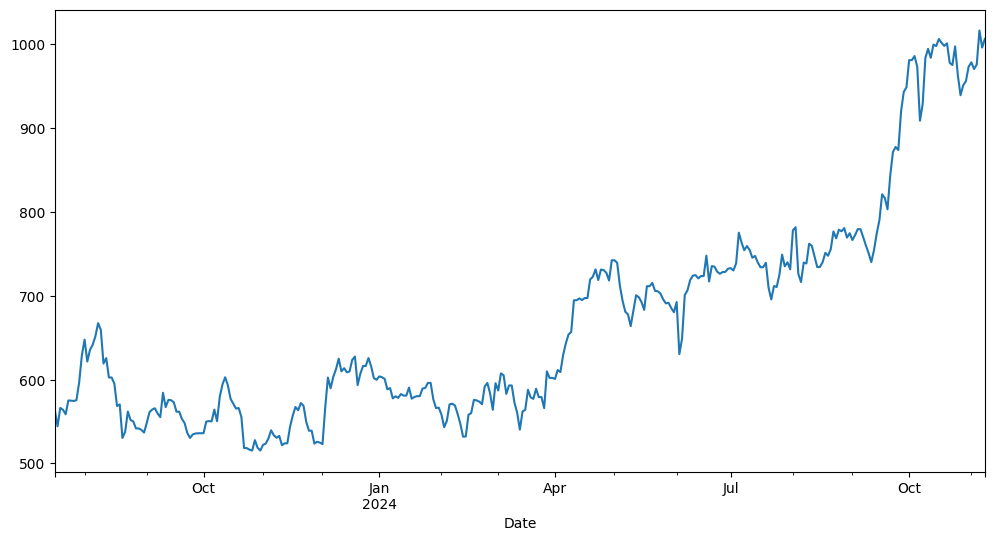

In [246]:
df['Close'].plot(figsize=(12,6));

In [247]:
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'Critical Values: {result[4]}')

ADF Statistic: 0.550849
p-value: 0.986339
Critical Values: {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}


In [248]:
df['close_diff'] = df['Close'].diff()
df.dropna(inplace=True)
result = adfuller(df['close_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'Critical Values: {result[4]}')

ADF Statistic: -14.482805
p-value: 0.000000
Critical Values: {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}


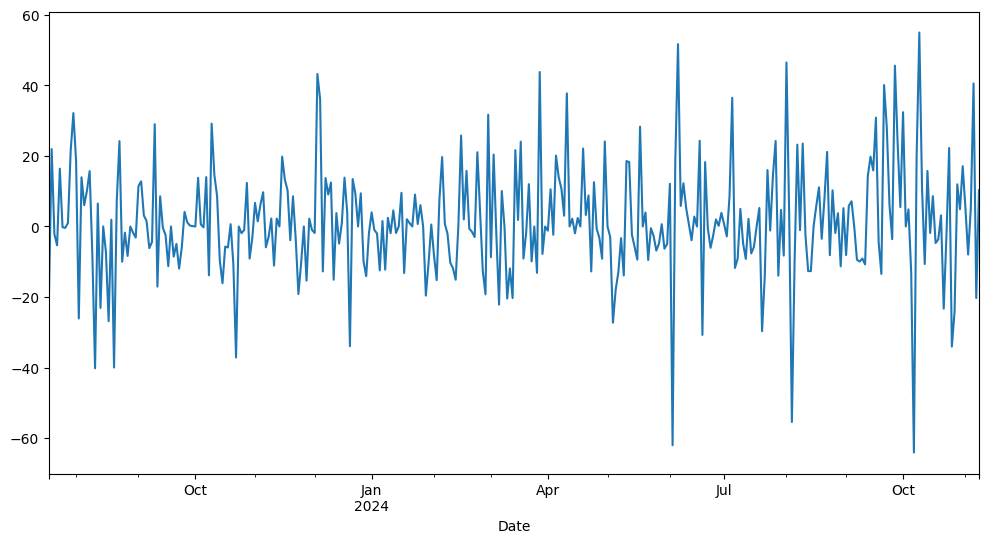

In [249]:
df['close_diff'].plot(figsize=(12,6));

Either model for df['Close'] or model for df['close_diff']

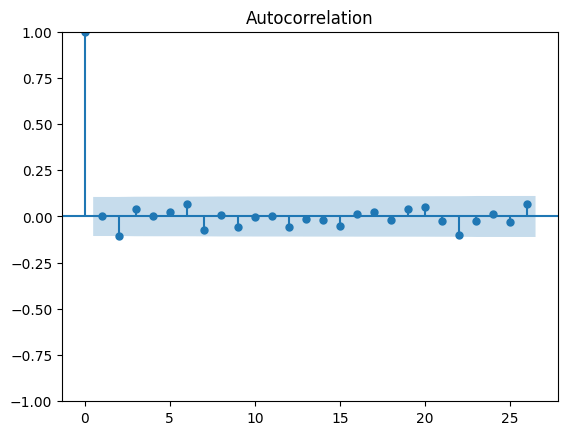

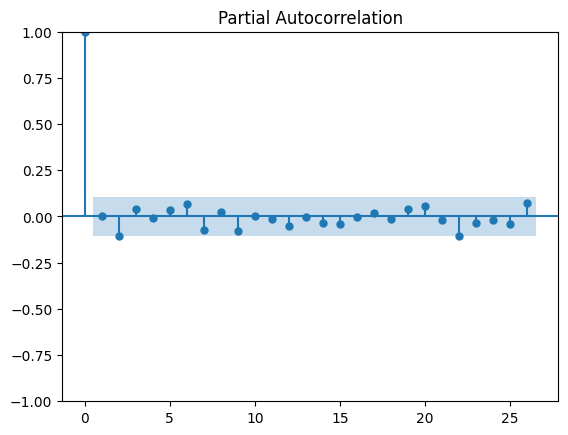

In [268]:
plot_acf(df['close_diff']);
plot_pacf(df['close_diff']);

In [269]:
df.shape

(344, 2)

In [270]:
df_train = df.head(340)
df_test = df.tail(4)

In [271]:
p=d=q = range(0,5)

pdq = list(itertools.product(p,d,q))

model_aic = {}
for params in pdq:
  try:
    model = ARIMA(df_train['close_diff'], order = params, freq='B')
    model_fit = model.fit()
    model_aic[params] = model_fit.aic
  except:
    print('Error')

In [272]:
min(model_aic, key=model_aic.get)

(0, 1, 3)

In [274]:
model = ARIMA(df_train['close_diff'], order = (0,1,3), freq='B')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_diff   No. Observations:                  340
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1413.684
Date:                Sun, 10 Nov 2024   AIC                           2835.369
Time:                        16:21:17   BIC                           2850.673
Sample:                    07-18-2023   HQIC                          2841.468
                         - 11-04-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9704      0.055    -17.620      0.000      -1.078      -0.862
ma.L2         -0.1343      0.060     -2.228      0.026      -0.252      -0.016
ma.L3          0.1094      0.042      2.622      0.009       0.028       0.191
sigma2       241.8733     13.483     17.940      0.000     215.448     268.299
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                80.13
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [275]:
y_pred = model_fit.predict(start=df_test.index[0], end=df_test.index[-1])
y_pred.head()

,predicted_mean
2024-11-05 00:00:00+00:00,1.016695
2024-11-06 00:00:00+00:00,2.435521
2024-11-07 00:00:00+00:00,1.575958
2024-11-08 00:00:00+00:00,1.575958


In [276]:
df_test['close_diff']

,close_diff
Date,
2024-11-05 00:00:00+00:00,5.349976
2024-11-06 00:00:00+00:00,40.549988
2024-11-07 00:00:00+00:00,-20.299988
2024-11-08 00:00:00+00:00,10.299988


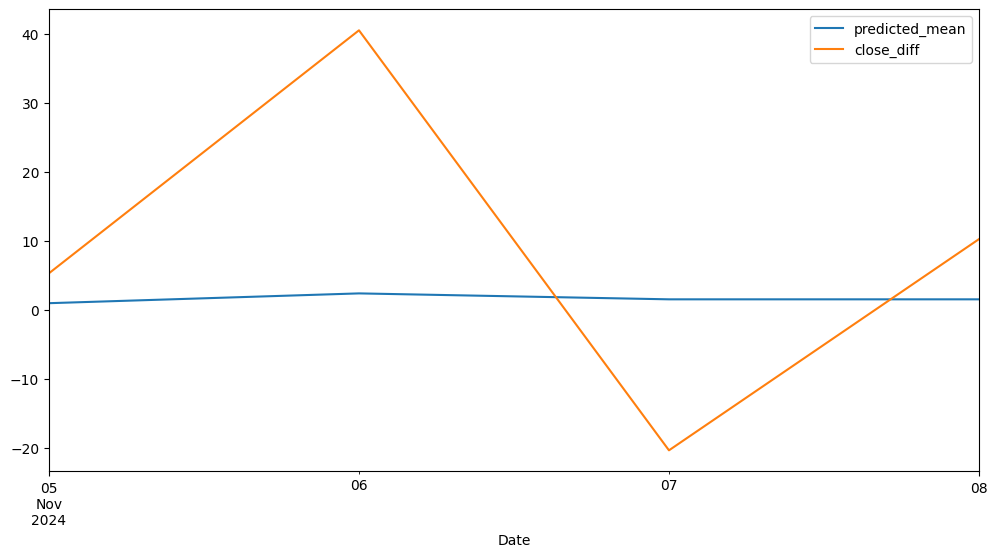

In [278]:
y_pred.plot(figsize=(12,6), legend=True)
df_test['close_diff'].plot(legend=True);

In [279]:
mean_squared_error(df_test['close_diff'], y_pred)

506.53889746241475

In [280]:
import math

math.sqrt(mean_squared_error(df_test['close_diff'], y_pred))

22.50641902796655